# Data Preparation

During today and following days, we will have a set of exercises about the data with UFO sightings around the world. At the end, we will create a machine learning model that will predict how long we can see the UFO based on the characteristics of a sighting.

Now, in this file, we are going to focus on data preparation. Try to replicate the steps from the tutorial, become familiar with the information and variables in the data and prepare it for the next phase, feature engineering.

You can download the data from [**here**](https://drive.google.com/open?id=0B2gZvn36c5CmRTJpS3pkUllmX1U).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Exercise

## DATA EXPLORATION

In [2]:
df_train=pd.read_csv('UFO_data.csv',sep=';',index_col='Unnamed: 0')

C:\Users\Federico\anaconda3\envs\boot_env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20,23,26,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
mxtype = df_train.columns.tolist()

In [4]:
df_train[mxtype[38]]

0        42621696.0
1        42621696.0
2        42621696.0
3        42621696.0
4        42621696.0
            ...    
80327           NaN
80328           NaN
80329           NaN
80330           NaN
80331           NaN
Name: ast_miss_distance, Length: 80332, dtype: float64

In [242]:
df_train.head()

timestamp                  city state country     shape  \
0  1949-10-10 20:30:00            san marcos    tx      us  cylinder   
1  1949-10-10 21:00:00          lackland afb    tx     NaN     light   
2  1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3  1956-10-10 21:00:00                  edna    tx      us    circle   
4  1960-10-10 20:00:00               kaneohe    hi      us     light   

   duration_seconds duration_text  \
0            2700.0    45 minutes   
1            7200.0       1-2 hrs   
2              20.0    20 seconds   
3              20.0      1/2 hour   
4             900.0    15 minutes   

                                               notes        date_reported  \
0  This event took place in early fall around 194...  2004-04-27 00:00:00   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  2005-12-16 00:00:00   
2  Green/Orange circular disc over Chester&#44 En...  2008-01-21 00:00:00   
3  My older brother and twin sister were leaving ...  2004-01-17 00:00:00   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...  2004-01-22 00:00:00   

         lat  ...  windBearing windBearingError  windSpeed  windSpeedError  \
0  29.883056  ...        154.0              NaN       4.89             NaN   
1  29.384210  ...        135.0              NaN       6.60             NaN   
2  53.200000  ...          NaN              NaN        NaN             NaN   
3  28.978333  ...        136.0              NaN       2.75             NaN   
4  21.418056  ...         80.0              NaN       3.60             NaN   

   ast_absolute_magnitude_h  ast_estimated_diameter  ast_is_dangerous  \
0                      21.5                0.297879              True   
1                      21.5                0.297879              True   
2                      21.5                0.297879              True   
3                      21.5                0.297879              True   
4                      21.5                0.297879              True   

   ast_miss_distance  ast_orbiting_body ast_relative_velocity  
0         42621696.0              Earth          13778.372043  
1         42621696.0              Earth          13778.372043  
2         42621696.0              Earth          13778.372043  
3         42621696.0              Earth          13778.372043  
4         42621696.0              Earth          13778.372043  

[5 rows x 41 columns]

In [5]:
df_train.dtypes

timestamp                    object
city                         object
state                        object
country                      object
shape                        object
duration_seconds            float64
duration_text                object
notes                        object
date_reported                object
lat                         float64
lng                         float64
date_event                   object
apparentTemperature         float64
cloudCover                  float64
cloudCoverError             float64
dewPoint                    float64
dewPointError               float64
humidity                    float64
humidityError               float64
icon                         object
precipIntensity             float64
precipProbability           float64
precipType                   object
pressure                    float64
pressureError               float64
summary                      object
temperature                 float64
temperatureError            

In [200]:
df_train['cloudCover']

0        0.00
1        0.00
2        0.75
3        0.12
4        0.63
         ... 
80327     NaN
80328     NaN
80329     NaN
80330     NaN
80331     NaN
Name: cloudCover, Length: 80332, dtype: float64

In [6]:
# import the widgets
import ipywidgets as widgets
# import the interact and the interact_manual from widgetss
from ipywidgets.widgets import interact, interact_manual
# import plotly 
import plotly.graph_objects as go
import numpy as np

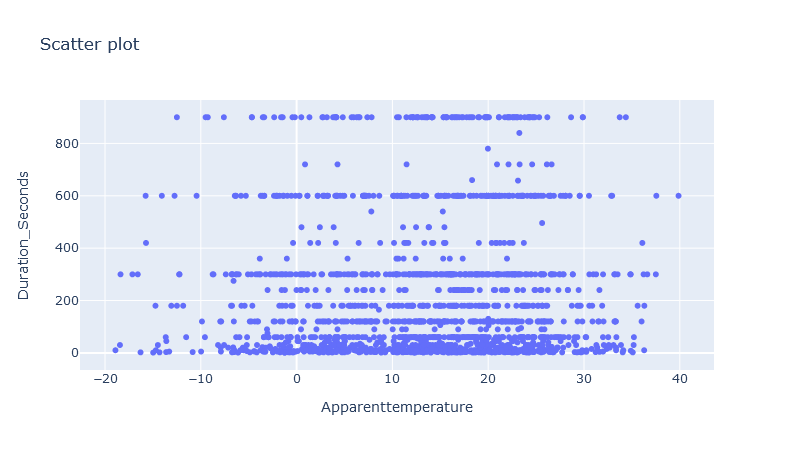

In [7]:
def scatter_plot(x,y='duration_seconds'):
    samp_data=df_train.sample(2000)
    # trace
    trace = [go.Scatter(x=samp_data[x], y=samp_data[y], mode='markers')]

    # layout
    layout = go.Layout(
                title = 'Scatter plot', # Graph title
                xaxis = dict(title = x.title()), # x-axis label
                yaxis = dict(title = y.title()),#,range=(1,np.log(7*24*3600))), # y-axis label
                hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

df_train = df_train.drop(df_train[df_train['duration_seconds']>900].index)
df_train = df_train.drop(df_train[df_train['apparentTemperature']<-20].index)
scatter_plot('apparentTemperature')

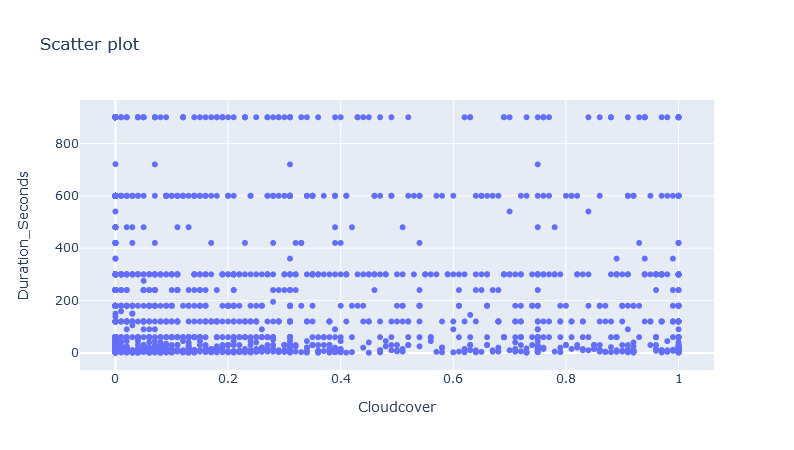

In [8]:
scatter_plot('cloudCover')

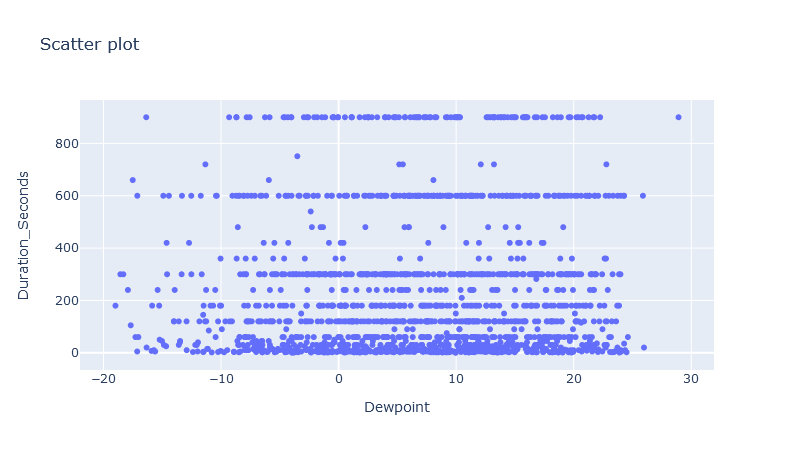

In [9]:
df_train = df_train.drop(df_train[df_train['dewPoint']<-20].index)
scatter_plot('dewPoint')

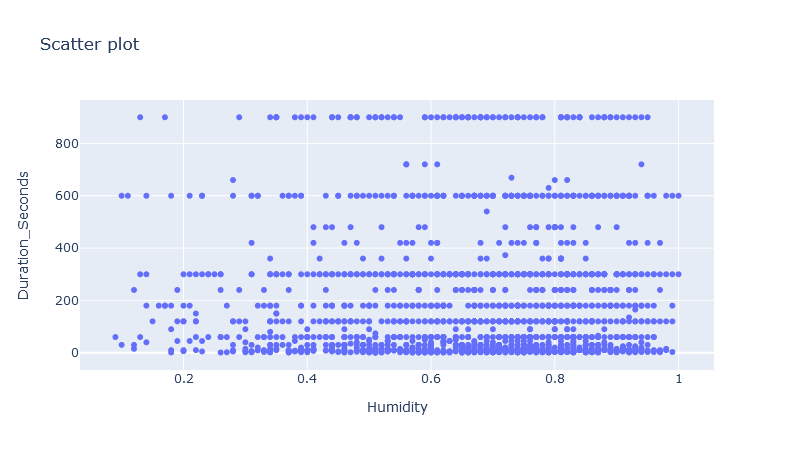

In [10]:
scatter_plot('humidity')

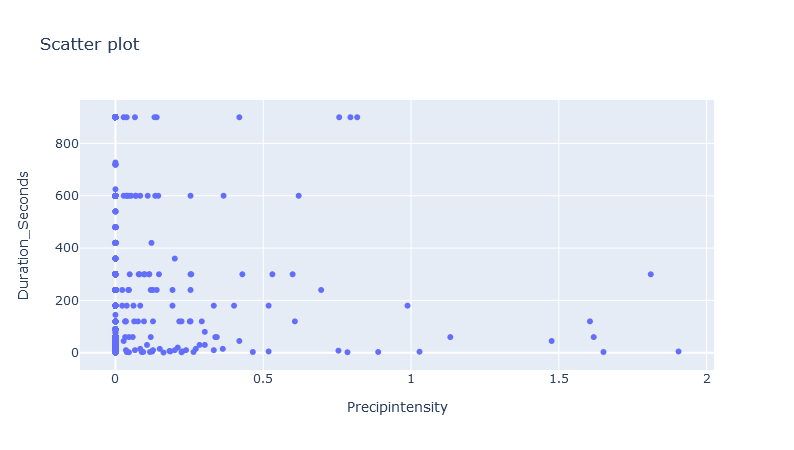

In [11]:
df_train = df_train.drop(df_train[df_train['precipIntensity']>2].index)
scatter_plot('precipIntensity')

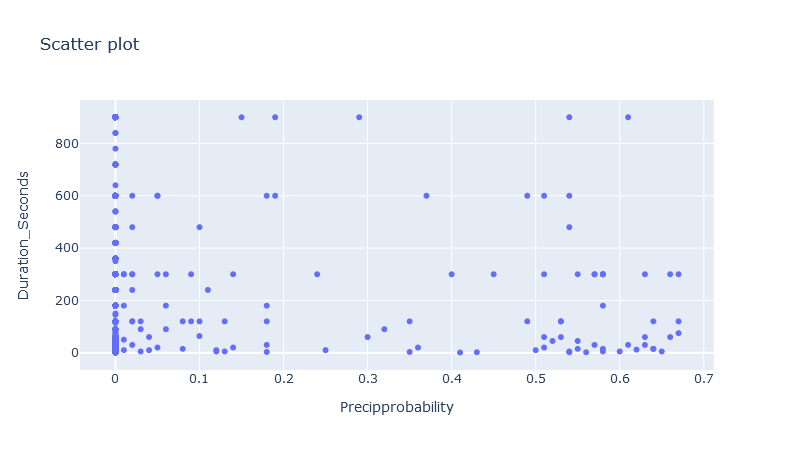

In [12]:
df_train = df_train.drop(df_train[(df_train['duration_seconds']>1500) & (df_train['precipProbability']>0.5)].index)
scatter_plot('precipProbability')

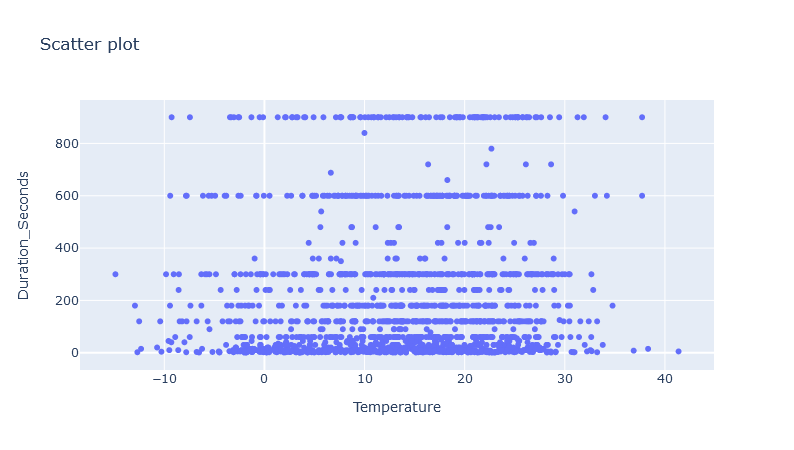

In [13]:
scatter_plot('temperature')

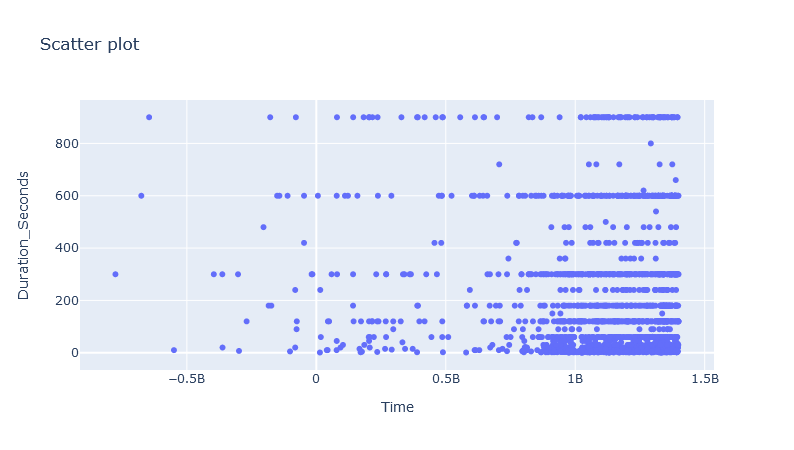

In [14]:
scatter_plot('time')

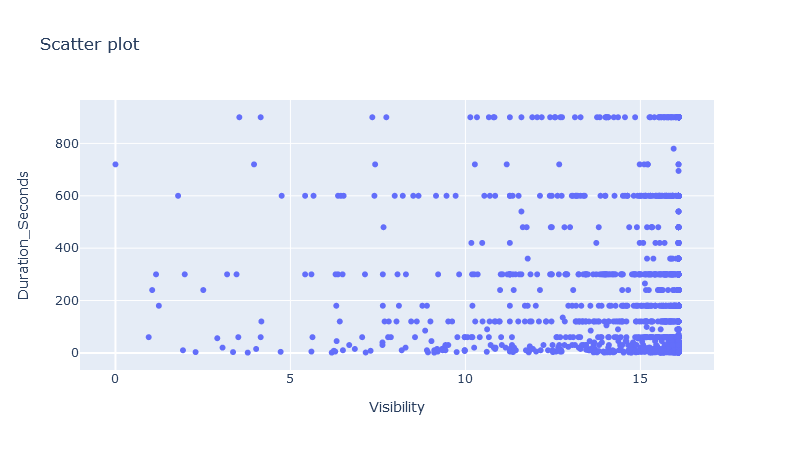

In [15]:
df_train = df_train.drop(df_train[(df_train['duration_seconds']>1000) & (df_train['visibility']<5)].index)
scatter_plot('visibility')

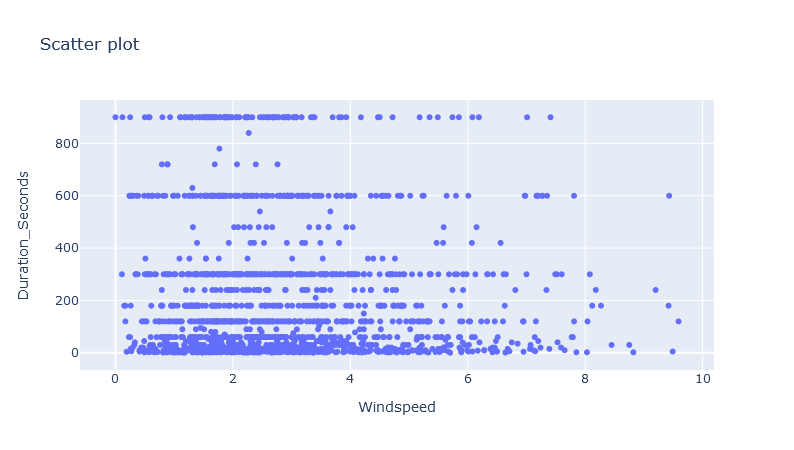

In [16]:
df_train = df_train.drop(df_train[df_train['windSpeed']>10].index)
scatter_plot('windSpeed')

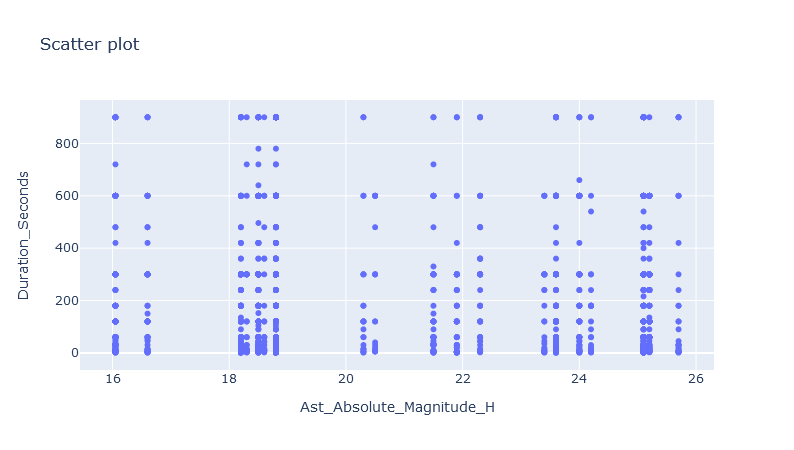

In [17]:
scatter_plot('ast_absolute_magnitude_h')

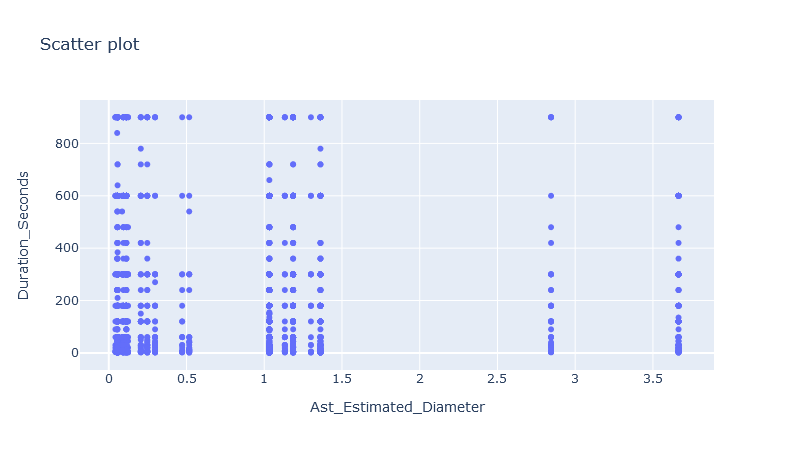

In [18]:
scatter_plot('ast_estimated_diameter')

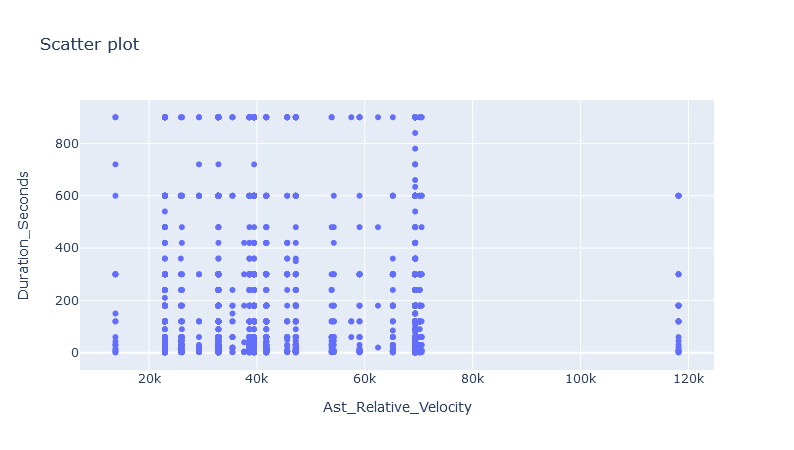

In [19]:
scatter_plot('ast_relative_velocity')

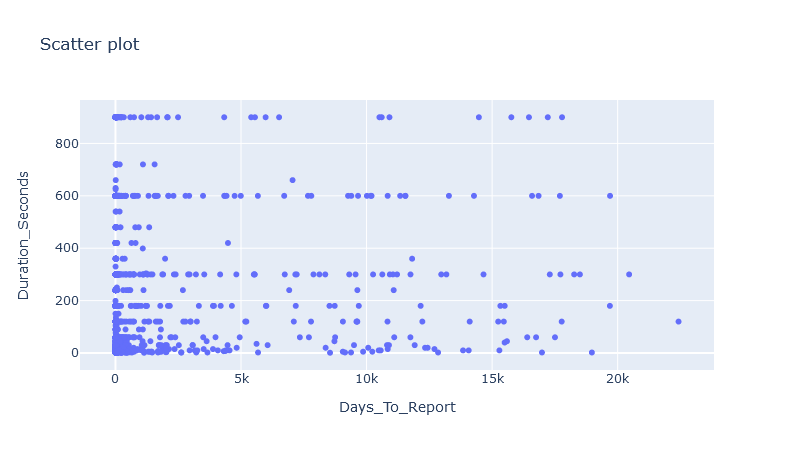

In [44]:
scatter_plot('days_to_report')

(-0.5, 2.5, 0.0, 900.0)

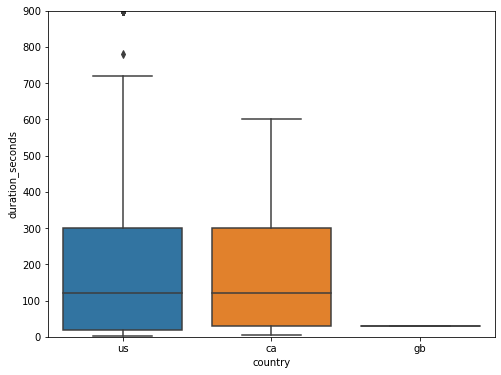

In [45]:
var = 'country'
samp_data = df_train.sample(2000)
data = samp_data[['duration_seconds',var]]
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='duration_seconds',data=data)
fig.axis(ymin=0,ymax=900)

(-0.5, 22.5, 0.0, 900.0)

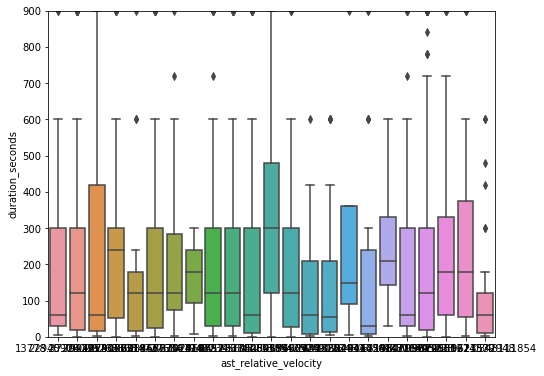

In [22]:
var = 'ast_relative_velocity'
samp_data = df_train.sample(2000)
data = samp_data[['duration_seconds',var]]
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='duration_seconds',data=data)
fig.axis(ymin=0,ymax=900)

(-0.5, 17.5, 0.0, 900.0)

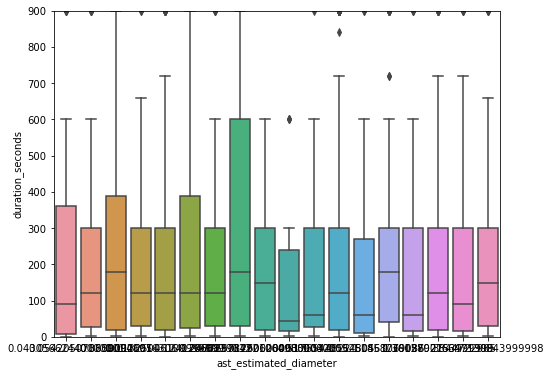

In [46]:
var = 'ast_estimated_diameter'
samp_data = df_train.sample(2000)
data = samp_data[['duration_seconds',var]]
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='duration_seconds',data=data)
fig.axis(ymin=0,ymax=900)

(-0.5, 18.5, 0.0, 900.0)

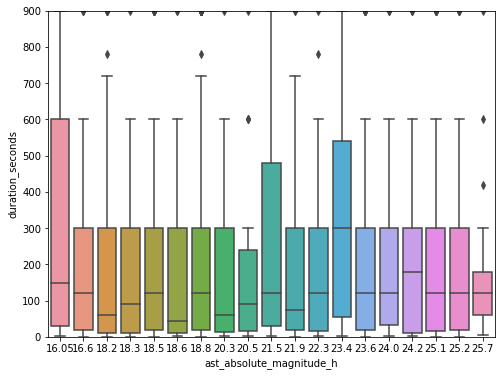

In [24]:
var = 'ast_absolute_magnitude_h'
samp_data = df_train.sample(2000)
data = samp_data[['duration_seconds',var]]
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='duration_seconds',data=data)
fig.axis(ymin=0,ymax=900)

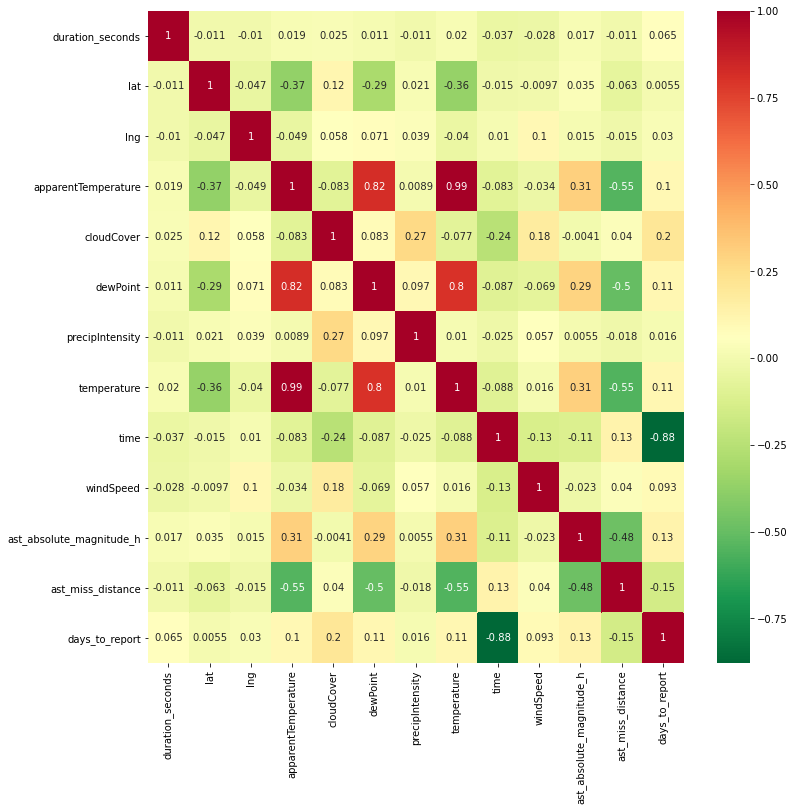

In [47]:
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["duration_seconds"])>0.01]
plt.figure(figsize=(12,12))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [27]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
pressureError        65506  0.999710
visibilityError      65505  0.999695
cloudCoverError      65505  0.999695
temperatureError     65503  0.999664
dewPointError        65503  0.999664
humidityError        65503  0.999664
windSpeedError       65503  0.999664
windBearingError     65503  0.999664
precipType           54576  0.832903
precipProbability    19915  0.303930
precipIntensity      19915  0.303930
pressure             13457  0.205372
cloudCover           13439  0.205097
windBearing          13029  0.198840
windSpeed            12984  0.198153
visibility           12794  0.195254
humidity             12696  0.193758
dewPoint             12696  0.193758
temperature          12675  0.193438
apparentTemperature  12675  0.193438

In [48]:
to_drop = missing_data.head(9).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

count    45549.000000
mean       216.287653
std        253.998867
min          1.000000
25%         20.000000
50%        120.000000
75%        300.000000
max        900.000000
Name: duration_seconds, dtype: float64


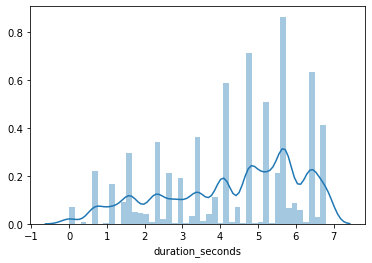

In [49]:
df_train = df_train.drop(df_train[df_train['duration_seconds'].apply(np.log)<0].index)
print(df_train['duration_seconds'].describe())
sns.distplot(df_train['duration_seconds'].apply(np.log))

In [30]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
precipIntensity           19885  0.303894
precipProbability         19885  0.303894
pressure                  13435  0.205321
cloudCover                13416  0.205031
windBearing               13007  0.198780
windSpeed                 12962  0.198093
visibility                12772  0.195189
dewPoint                  12675  0.193707
humidity                  12675  0.193707
apparentTemperature       12654  0.193386
temperature               12654  0.193386
summary                   12644  0.193233
icon                      12644  0.193233
time                      12509  0.191170
country                    7647  0.116866
state                      4810  0.073509
shape                      1507  0.023031
timestamp                   542  0.008283
ast_orbiting_body           384  0.005869
ast_absolute_magnitude_h    384  0.005869

In [50]:
data0 = df_train.copy()

In [32]:
df_train = df_train.drop(df_train[df_train['precipIntensity'].isnull()].index)

In [51]:
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

Series([], dtype: object)

In [52]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

In [35]:
var = 'pressure'
df_train[var] = df_train[var].fillna(df_train[var].mean())
var = 'apparentTemperature'
df_train[var] = df_train[var].fillna(df_train[var].mean())
var = 'visibility'
df_train[var] = df_train[var].fillna(df_train[var].mean())
var = 'temperature'
df_train[var] = df_train[var].fillna(df_train[var].mean())
var = 'windBearing'
df_train[var] = df_train[var].fillna(df_train[var].min())
var = 'humidity'
df_train[var] = df_train[var].fillna(df_train[var].mean())
var = 'dewPoint'
df_train[var] = df_train[var].fillna(df_train[var].mean())
var = 'windSpeed'
df_train[var] = df_train[var].fillna(df_train[var].min())
var = 'cloudCover'
df_train[var] = df_train[var].fillna(df_train[var].mean())

In [53]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

Series([], dtype: object)

In [54]:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

In [292]:
for i in cat_cols_with_missing:
    df_train[i] = df_train[i].fillna("Unknown")

In [293]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

Series([], dtype: object)

In [346]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
num_feats

['duration_seconds',
 'lat',
 'lng',
 'apparentTemperature',
 'cloudCover',
 'dewPoint',
 'humidity',
 'precipIntensity',
 'precipProbability',
 'pressure',
 'temperature',
 'time',
 'visibility',
 'windBearing',
 'windSpeed',
 'ast_absolute_magnitude_h',
 'ast_estimated_diameter',
 'ast_is_dangerous',
 'ast_miss_distance',
 'ast_relative_velocity',
 'pressure_missing_ind',
 'apparentTemperature_missing_ind',
 'visibility_missing_ind',
 'temperature_missing_ind',
 'windBearing_missing_ind',
 'humidity_missing_ind',
 'dewPoint_missing_ind',
 'windSpeed_missing_ind',
 'cloudCover_missing_ind',
 'days_to_report']

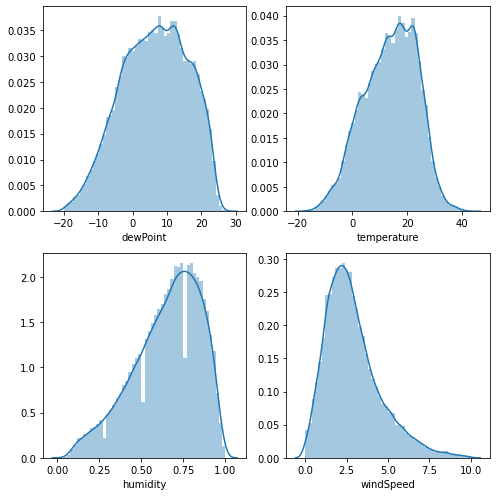

In [301]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7))

var = 'dewPoint'
sns.distplot(df_train[var],ax=axes[0,0])
var = 'temperature'
sns.distplot(df_train[var],ax=axes[0,1])
var = 'humidity'
sns.distplot(df_train[var],ax=axes[1,0])
var = 'windSpeed'
sns.distplot(df_train[var],ax=axes[1,1])

plt.tight_layout()

In [310]:
from scipy import stats
stats.shapiro(df_train['humidity'].sample(5000))

ShapiroResult(statistic=0.9626701474189758, pvalue=4.492833999403826e-34)

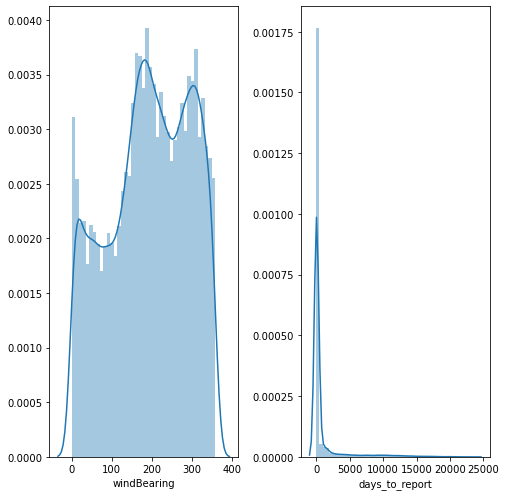

In [347]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(7, 7))

var = 'windBearing'
sns.distplot(df_train[var],ax=axes[0])
var = 'days_to_report'
sns.distplot(df_train[var],ax=axes[1])

plt.tight_layout()

In [329]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
cat_feats.remove('timestamp')#,'duration_text','notes','date_reported','date_event'])
cat_feats.remove('duration_text')#,'notes','date_reported','date_event'])
cat_feats.remove('notes')
cat_feats.remove('summary')
df_dummy = pd.get_dummies(df_train[cat_feats])

In [330]:
cat_feats

['city',
 'state',
 'country',
 'shape',
 'date_reported',
 'date_event',
 'icon',
 'ast_orbiting_body']

In [38]:
df_train['days_to_report']=(pd.to_datetime(df_train['date_reported'])-pd.to_datetime(df_train['date_event'])).dt.days

In [39]:
df_train['days_to_report']

5        16635
8        15501
10       12804
11       14490
13       13641
         ...  
65530      327
65532        9
65533        7
65534        7
65535       79
Name: days_to_report, Length: 45549, dtype: int64